In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [17]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[ 0.91777412  0.71457578  0.54254437 ...,  0.49504863  0.97708073
   0.44077382]
 [ 0.31827281  0.51979699  0.57813643 ...,  0.02116519  0.75046461
   0.17604213]
 [ 0.45851421  0.51312271  0.48402089 ...,  0.28825314  0.27479513
   0.60105189]
 ..., 
 [ 0.09223334  0.45285232  0.94842416 ...,  0.06463297  0.53147919
   0.51179774]
 [ 0.4444723   0.9559604   0.57988831 ...,  0.49981937  0.27882109
   0.97201969]
 [ 0.37862344  0.24592521  0.76662351 ...,  0.51365543  0.81850517
   0.56299811]] 

 [[ 0.3082907   0.1772516   0.01213146 ...,  0.20895683  0.89048423
   0.80995692]
 [ 0.21357588  0.61317303  0.89392861 ...,  0.83261138  0.1779116
   0.19272212]
 [ 0.53080293  0.35616402  0.08463847 ...,  0.03224081  0.09869262
   0.94919423]
 ..., 
 [ 0.74961812  0.6032765   0.42486352 ...,  0.6618156   0.85946304
   0.73047613]
 [ 0.43365714  0.51919463  0.14519432 ...,  0.77699103  0.75899386
   0.39098773]
 [ 0.30232038  0.20422823  0.00785936 ...,  0.38157111  0.18255749
   0.29926307]

Solution
===

In [40]:
def naive(p, q):
    r = np.zeros((len(p), len(q)))
    for i in range (len(p)): 
        for j in range(len(q)):
            r[i][j] = np.linalg.norm(p[i] - q[j])
    return r
naive(p,q)

array([[ 0.60599073,  0.93659449,  0.91124856,  0.59321356,  0.27561751],
       [ 0.80746999,  0.21102354,  0.67268649,  0.22495084,  0.46534491],
       [ 0.35654215,  0.75217493,  0.57200052,  0.49900068,  0.23310825],
       [ 0.67281411,  0.52407472,  0.31520226,  0.63212897,  0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [5]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [43]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    r = (p[rows.ravel()]-q[cols.ravel()])
    return np.reshape(np.linalg.norm(r, axis=1), (len(p), len(q)))
    
with_indices(p, q)

array([[ 0.60599073,  0.93659449,  0.91124856,  0.59321356,  0.27561751],
       [ 0.80746999,  0.21102354,  0.67268649,  0.22495084,  0.46534491],
       [ 0.35654215,  0.75217493,  0.57200052,  0.49900068,  0.23310825],
       [ 0.67281411,  0.52407472,  0.31520226,  0.63212897,  0.70277376]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [8]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [9]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [44]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

10 loops, best of 3: 55 ms per loop
100 loops, best of 3: 13.3 ms per loop
1000 loops, best of 3: 961 µs per loop
100 loops, best of 3: 6.36 ms per loop


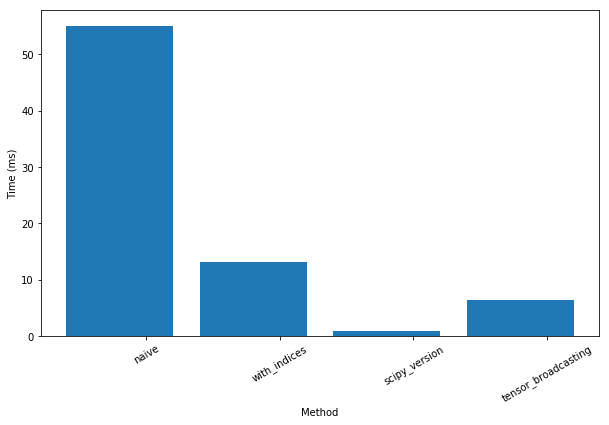

In [45]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()